# PANDA HANDLER

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as dates

%matplotlib inline

In [93]:
df = pd.read_excel('BMF2018.xltx')

# PEGANDO BLUE CHIPS

In [94]:
bmf2018 = df
bmf2018.tail()

,TIPO DE REGISTRO,DATA DO PREGAO,CODIGO BDI,CODIGO DE NEGOGIACAO DO PAPEL,TIPO DE MERCADO,NOME RESUMIDO DA EMPRESA EMISSORA,ESPECIFICACAO DO PAPEL,MOEDA DE REFERENCIA,PRECO DE ABERTURA,PRECO MAXIMO,...,PRECO MELHOR OFERTA COMPRA,PRECO MELHOR OFERTA DE VENDA,NUMERO DE NEGOCIOS EFETUADOS COM O PAPEL,QUANTIDADE TOTAL DE TITULOS NEGOCIADOS,VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL,PRECO DE EXERCICIO OPCAO,Unnamed: 19,Unnamed: 20,CODIGO DO PAPEL NO SISTEMA,NUMERO DE DISTRIBUICAO DO PAPEL
580151,1,20181228,12.0,XPLG11,10,FII XP LOG,CI,R$,10000.0,10030.0,...,10000.0,10030.0,804.0,17310.0,172940811.0,0.0,9.999123e+14,0.0,BRXPLGCTF002,106.0
580152,1,20181228,12.0,XPML11,10,FII XP MALLS,CI ER,R$,10790.0,10800.0,...,10750.0,10780.0,1321.0,20067.0,215038945.0,0.0,9.999123e+14,0.0,BRXPMLCTF000,113.0
580153,1,20181228,14.0,XPOM11,10,FIP XP OMEGA,CI,R$,10301.0,10301.0,...,10300.0,10599.0,5.0,494.0,5088600.0,0.0,9.999123e+14,0.0,BRXPOMCTF004,115.0
580154,1,20181228,12.0,XTED11,10,FII TRXE COR,CI,R$,1751.0,1790.0,...,1751.0,1790.0,23.0,222.0,390676.0,0.0,9.999123e+14,0.0,BRXTEDCTF006,143.0
580155,99,COTAHIST,0.2,018BOVESPA 2,18,122800000580,157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# PRIMEITO AGRUPA DE ACORDO COM ATIVO
df_gb = bmf2018.groupby('CODIGO DE NEGOGIACAO DO PAPEL')

# DEPOIS SOMA O VOLUME E ORDENAR DECRESCENTE
bc = df_gb.sum()['VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL'].sort_values(ascending=False)

# CRIA INDICE PARA O NOME DO ATIVO DEIXAR DE SER O INDICE
blue_chips = bc.reset_index()['CODIGO DE NEGOGIACAO DO PAPEL']

# SELECIONA SOMENTE OS 100 ATIVOS QUE TEM NOME PADRAO (EXCLUI MERCADO A TERMO, FIIs, ETC)  
blue_chips = blue_chips[blue_chips.apply(lambda name: len(name) <= 5 )].iloc[:100]
blue_chips.nunique()
# SALVA NUM CSV
blue_chips.to_csv('BLUECHIPS',index=False)

/home/rodrigo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [96]:
blue_chips.nunique()


100

# GERANDO TABELA DE CADA BLUE CHIP

In [97]:
for bc_code in blue_chips:
    # PEGA SOMENTE OS QUE TEM O CODIGO QUE EU QUERO (PARA CADA 'BC_CODE' - BLUE CHIP)
    stock = bmf2018[bmf2018['CODIGO DE NEGOGIACAO DO PAPEL'] == bc_code].reset_index()
    # SELECIONA AS COLUNAS IMPORTANTES
    colunas_importantes = ['DATA DO PREGAO', 'CODIGO DE NEGOGIACAO DO PAPEL', 'NOME RESUMIDO DA EMPRESA EMISSORA', 'PRECO DE ABERTURA', 'PRECO MAXIMO', 'PRECO MINIMO', 'PRECO FECHAMENTO', 'VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL']
    stock = stock[colunas_importantes]
    # AJUSTE DE VALOR
    stock['PRECO MAXIMO'] = stock['PRECO MAXIMO']/100
    stock['PRECO MINIMO'] = stock['PRECO MINIMO']/100
    stock['PRECO DE ABERTURA'] = stock['PRECO DE ABERTURA']/100
    stock['PRECO FECHAMENTO'] = stock['PRECO FECHAMENTO']/100
    stock['VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL'] = stock['VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL']/100
    # CRIA COLUNAS DE ESTATISTICA
    stock['MA_20'] = stock['PRECO FECHAMENTO'].rolling(window=20).mean()
    stock['MA_40'] = stock['PRECO FECHAMENTO'].rolling(window=40).mean()
    stock['STD_20'] = stock['PRECO FECHAMENTO'].rolling(window=20).std()
    stock['STD_40'] = stock['PRECO FECHAMENTO'].rolling(window=40).std()
    stock['BANDA_1_40 SUPERIOR'] = stock['MA_40'] + 2* stock['STD_40']
    stock['BANDA_1_40 INFERIOR'] = stock['MA_40'] - 2* stock['STD_40']
    stock['BANDA_2_40 SUPERIOR'] = stock['MA_40'] + 3* stock['STD_40']
    stock['BANDA_2_40 INFERIOR'] = stock['MA_40'] - 3* stock['STD_40']
    stock['BANDA_3_40 SUPERIOR'] = stock['MA_40'] + 4* stock['STD_40']
    stock['BANDA_3_40 INFERIOR'] = stock['MA_40'] - 4* stock['STD_40']
    stock = stock.fillna(value=0)
    # SALVA NA PASTA
    save_dir = 'HISTORICO_2018/' + stock['CODIGO DE NEGOGIACAO DO PAPEL'].iloc[0] + '_2018'
    stock.to_csv(save_dir,index=False)

# GERANDO GRÁFICO

In [3]:
stock = pd.read_csv('HISTORICO_2018/PETR4_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
stock.head()

,CODIGO DE NEGOGIACAO DO PAPEL,NOME RESUMIDO DA EMPRESA EMISSORA,PRECO DE ABERTURA,PRECO MAXIMO,PRECO MINIMO,PRECO FECHAMENTO,VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL,MA_20,MA_40,STD_20,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR,BANDA_3_40 SUPERIOR,BANDA_3_40 INFERIOR
DATA DO PREGAO,,,,,,,,,,,,,,,,,
2018-01-02,PETR4,PETROBRAS,16.19,16.55,16.19,16.55,549628149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,PETR4,PETROBRAS,16.49,16.72,16.37,16.70,927610016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-04,PETR4,PETROBRAS,16.78,16.96,16.62,16.73,624099864.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-05,PETR4,PETROBRAS,16.70,16.86,16.57,16.83,452007598.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-08,PETR4,PETROBRAS,16.74,17.03,16.71,17.03,480575914.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


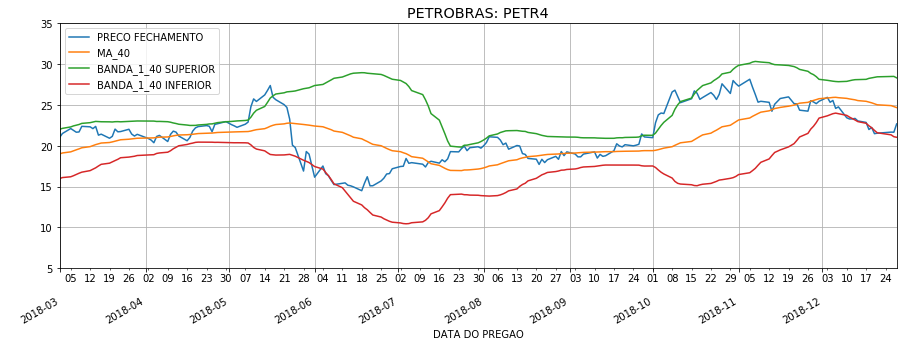

In [176]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

stock_plt = stock[['PRECO FECHAMENTO','MA_40','BANDA_1_40 SUPERIOR','BANDA_1_40 INFERIOR']].plot
title_stg = stock['NOME RESUMIDO DA EMPRESA EMISSORA'].iloc[0] + ": " + stock['CODIGO DE NEGOGIACAO DO PAPEL'].iloc[0]
stock_plt = stock_plt.line(title = title_stg)

stock_plt.set_ylim([5, 35])
stock_plt.set_xlim(['2018-03-01', '2018-12-28'])
stock_plt.grid()
stock_plt.xaxis.set_major_locator(dates.MonthLocator())
stock_plt.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
stock_plt.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
stock_plt.xaxis.set_minor_formatter(dates.DateFormatter('%d'))



# CRIANDO TABELAS AUXILIARES DAS ESTRATEGIAS 
# (CREATE STRATEGIES)

In [276]:
df = pd.DataFrame()
df['CODIGO DE NEGOGIACAO DO PAPEL'] = blue_chips.unique()
df['ESTADO'] = 'PROCURANDO ENTRADA'
df['AUX'] = 'EMPTY'


save_dir = 'STRATEGIES/BollingerBand'
df.to_csv(save_dir,index=False)

In [277]:
df = pd.read_csv('STRATEGIES/BollingerBand')
df.head()

,CODIGO DE NEGOGIACAO DO PAPEL,ESTADO,AUX
0,PETR4,PROCURANDO ENTRADA,EMPTY
1,VALE3,PROCURANDO ENTRADA,EMPTY
2,ITUB4,PROCURANDO ENTRADA,EMPTY
3,BBDC4,PROCURANDO ENTRADA,EMPTY
4,BBAS3,PROCURANDO ENTRADA,EMPTY


In [278]:
df = df.set_index('CODIGO DE NEGOGIACAO DO PAPEL')

df.loc['PETR4']['ESTADO']

'PROCURANDO ENTRADA'

# TABELAS DE BACK TEST 
# (CREATE BACK_TEST)

In [279]:
df = pd.DataFrame()
df['CODIGO DE NEGOGIACAO DO PAPEL'] = ['']
df['DATA DO PREGAO'] = ['']
df['PRECO'] = ['']
df['OPERACAO'] = ['']

save_dir = 'BACK_TEST/BollingerBand'
df.to_csv(save_dir,index=False)

In [281]:
df

,CODIGO DE NEGOGIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,,,,


# BENCHMARKING
# (READ BACK_TEST)

In [ ]:
# RUN AFTER DF CREATED BY DOM !!!! AND ONLY ONCE

In [282]:
df = pd.read_csv('BACK_TEST/BollingerBand')
df = df.dropna()
df['DATA DO PREGAO'] = df['DATA DO PREGAO'].apply(lambda name: int(name) )
save_dir = 'BACK_TEST/BollingerBand'
df.to_csv(save_dir,index=False)
df = pd.read_csv('BACK_TEST/BollingerBand', parse_dates=['DATA DO PREGAO'])
df


,CODIGO DE NEGOGIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,PETR4,2018-04-30,22.97,SELL
1,PETR4,2018-05-24,20.08,BUY
2,PETR4,2018-05-28,16.91,BUY
3,PETR4,2018-07-13,18.11,SELL
4,PETR4,2018-09-27,21.46,SELL
5,PETR4,2018-11-13,24.24,BUY
6,PETR4,2018-12-10,23.44,BUY


# GERANDO GRAFICO COMPRA/VENDA

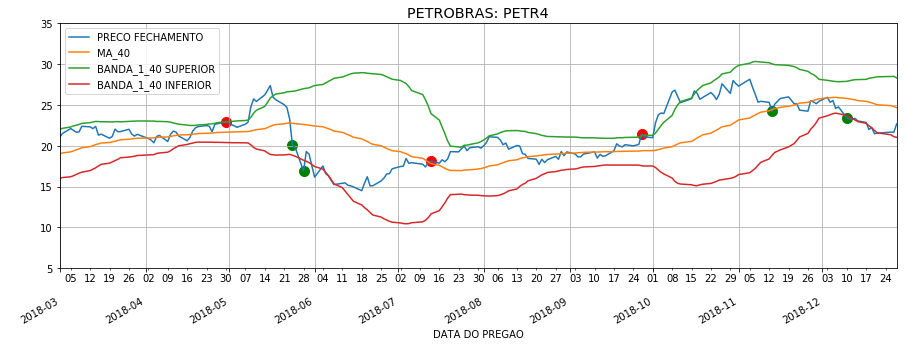

In [294]:
stock = pd.read_csv('HISTORICO_2018/PETR4_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

stock_plt = stock[['PRECO FECHAMENTO','MA_40','BANDA_1_40 SUPERIOR','BANDA_1_40 INFERIOR']].plot
title_stg = stock['NOME RESUMIDO DA EMPRESA EMISSORA'].iloc[0] + ": " + stock['CODIGO DE NEGOGIACAO DO PAPEL'].iloc[0]
stock_plt = stock_plt.line(title = title_stg)

stock_plt.set_ylim([5, 35])
stock_plt.set_xlim(['2018-03-01', '2018-12-28'])

stock_plt.grid()
stock_plt.xaxis.set_major_locator(dates.MonthLocator())
stock_plt.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
stock_plt.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
stock_plt.xaxis.set_minor_formatter(dates.DateFormatter('%d'))


for each_order in range(len(df)):
    if df['OPERACAO'].iloc[each_order] == 'SELL':
        cor = 'red'
    else:
        cor = 'green'
    stock_plt.scatter(df['DATA DO PREGAO'].iloc[each_order], df['PRECO'].iloc[each_order], s=100, c=cor)



Aparentemente teve gap do candle em 24 do 5, por isso demorou para fechar a primeira operação
https://g1.globo.com/economia/noticia/bovespa-em-24052018.ghtml

# Candle Plot Test

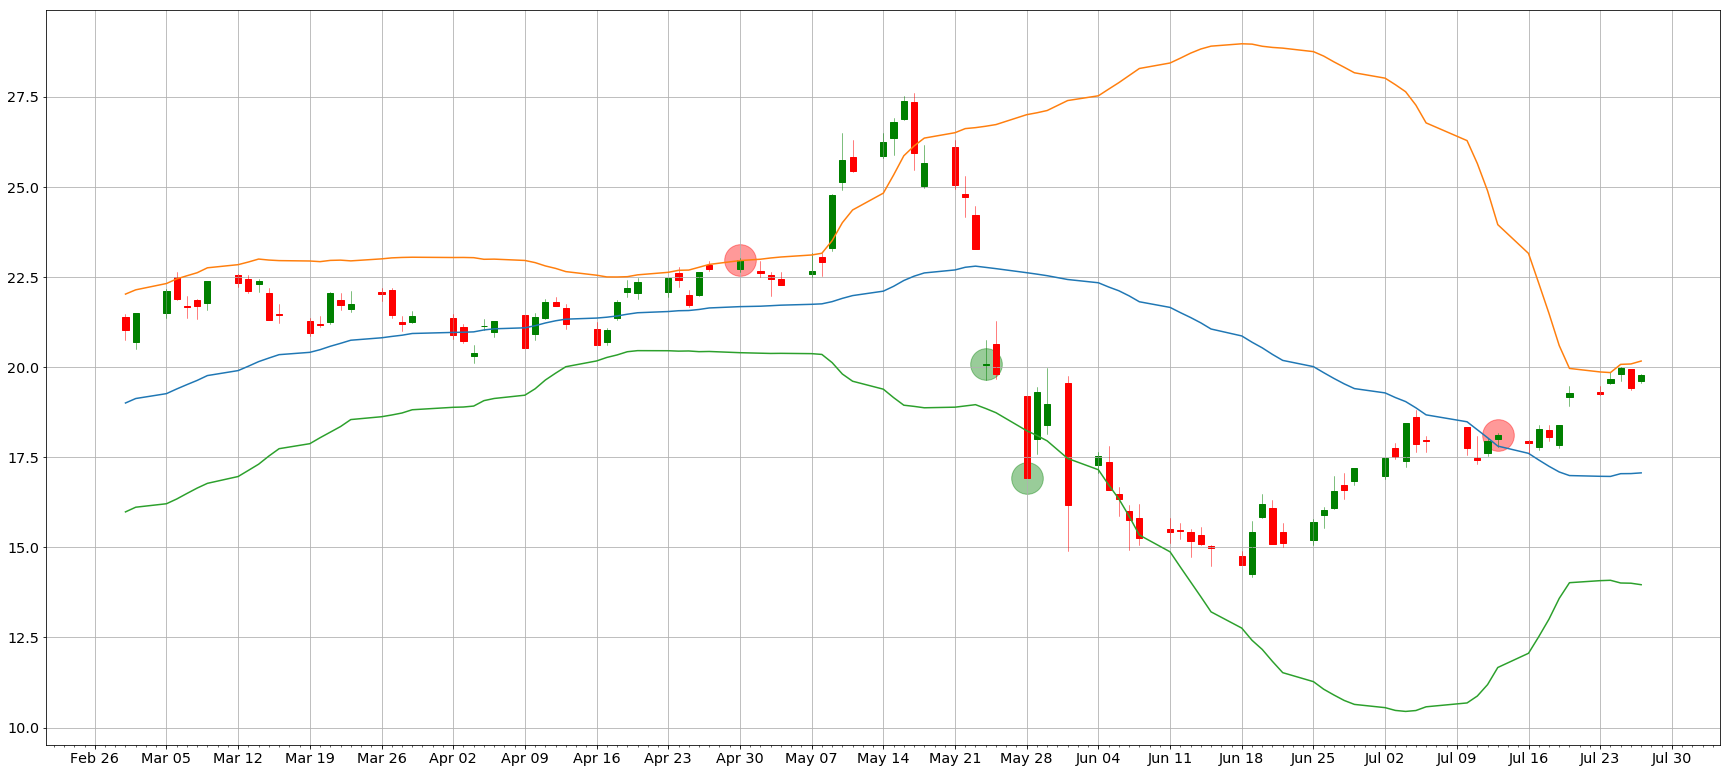

In [69]:
import mpl_finance as candle
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
params = {'legend.fontsize': 'medium',
          'figure.figsize': (30, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


stock = pd.read_csv('HISTORICO_2018/PETR4_2018', index_col = 'DATA DO PREGAO', parse_dates=True)


stock['date_ax'] = stock.index
stock['date_ax'] = stock['date_ax'].apply(lambda date: date2num(date))

stock = stock.loc['2018-03-01' : '2018-7-28'].reset_index()

candle_values = [tuple(vals) for vals in stock[['date_ax', 'PRECO DE ABERTURA', 'PRECO MAXIMO', 'PRECO MINIMO', 'PRECO FECHAMENTO']].values]


fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
candle.candlestick_ohlc(ax, candle_values, width=0.6, colorup='g',colordown='r');
plt.grid()


mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

ax.plot(stock['date_ax'],stock['MA_40'])
ax.plot(stock['date_ax'],stock['BANDA_1_40 SUPERIOR'])
ax.plot(stock['date_ax'],stock['BANDA_1_40 INFERIOR'])


for each_order in range(len(df)-3):
    if df['OPERACAO'].iloc[each_order] == 'SELL':
        cor = 'red'
    else:
        cor = 'green'
        # PARA CONTINUAR PRECISO EXECUTAR ANTES O CODIGO DE PEGAR DF DAS OPERACOES
    ax.scatter(df['DATA DO PREGAO'].iloc[each_order], df['PRECO'].iloc[each_order], s=1000, c=cor, alpha=.4)